In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [6]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
data = data.drop(['ID','Doors'], axis=1)

In [9]:
for col in data.columns:
    print(f"Column Name {col} is :\n {data[col].unique()}\n")
    print('='*35)

Column Name Price is :
 [13328 16621  8467 ... 56814 63886 22075]

Column Name Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '8

In [12]:
data['Levy'] = data['Levy'].replace('-', np.nan)
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')
data['Levy'] = data['Levy'].fillna(data['Levy'].mean())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(2), int64(3), object(11)
memo

In [15]:
data['Mileage'] = data['Mileage'].str.replace('km', '').astype(int)

In [ ]:
data['Engine Volume'] = data['Engine volume'].str.replace('Turbo', '').astype(float)
data = data.drop('Engine Volume', axis=1, inplace=True)

In [19]:
import datetime as dt
year = dt.datetime.now().year
data['Age'] = year - data['Prod. year']

In [20]:
data['Age']

0        15
1        14
2        19
3        14
4        11
         ..
19232    26
19233    14
19234    15
19235    18
19236    13
Name: Age, Length: 19237, dtype: int64

In [21]:
data = data.drop('Prod. year', axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  int32  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  Engine Volume     19237 non-null  float64
 16  Age               19237 non-null  int64 

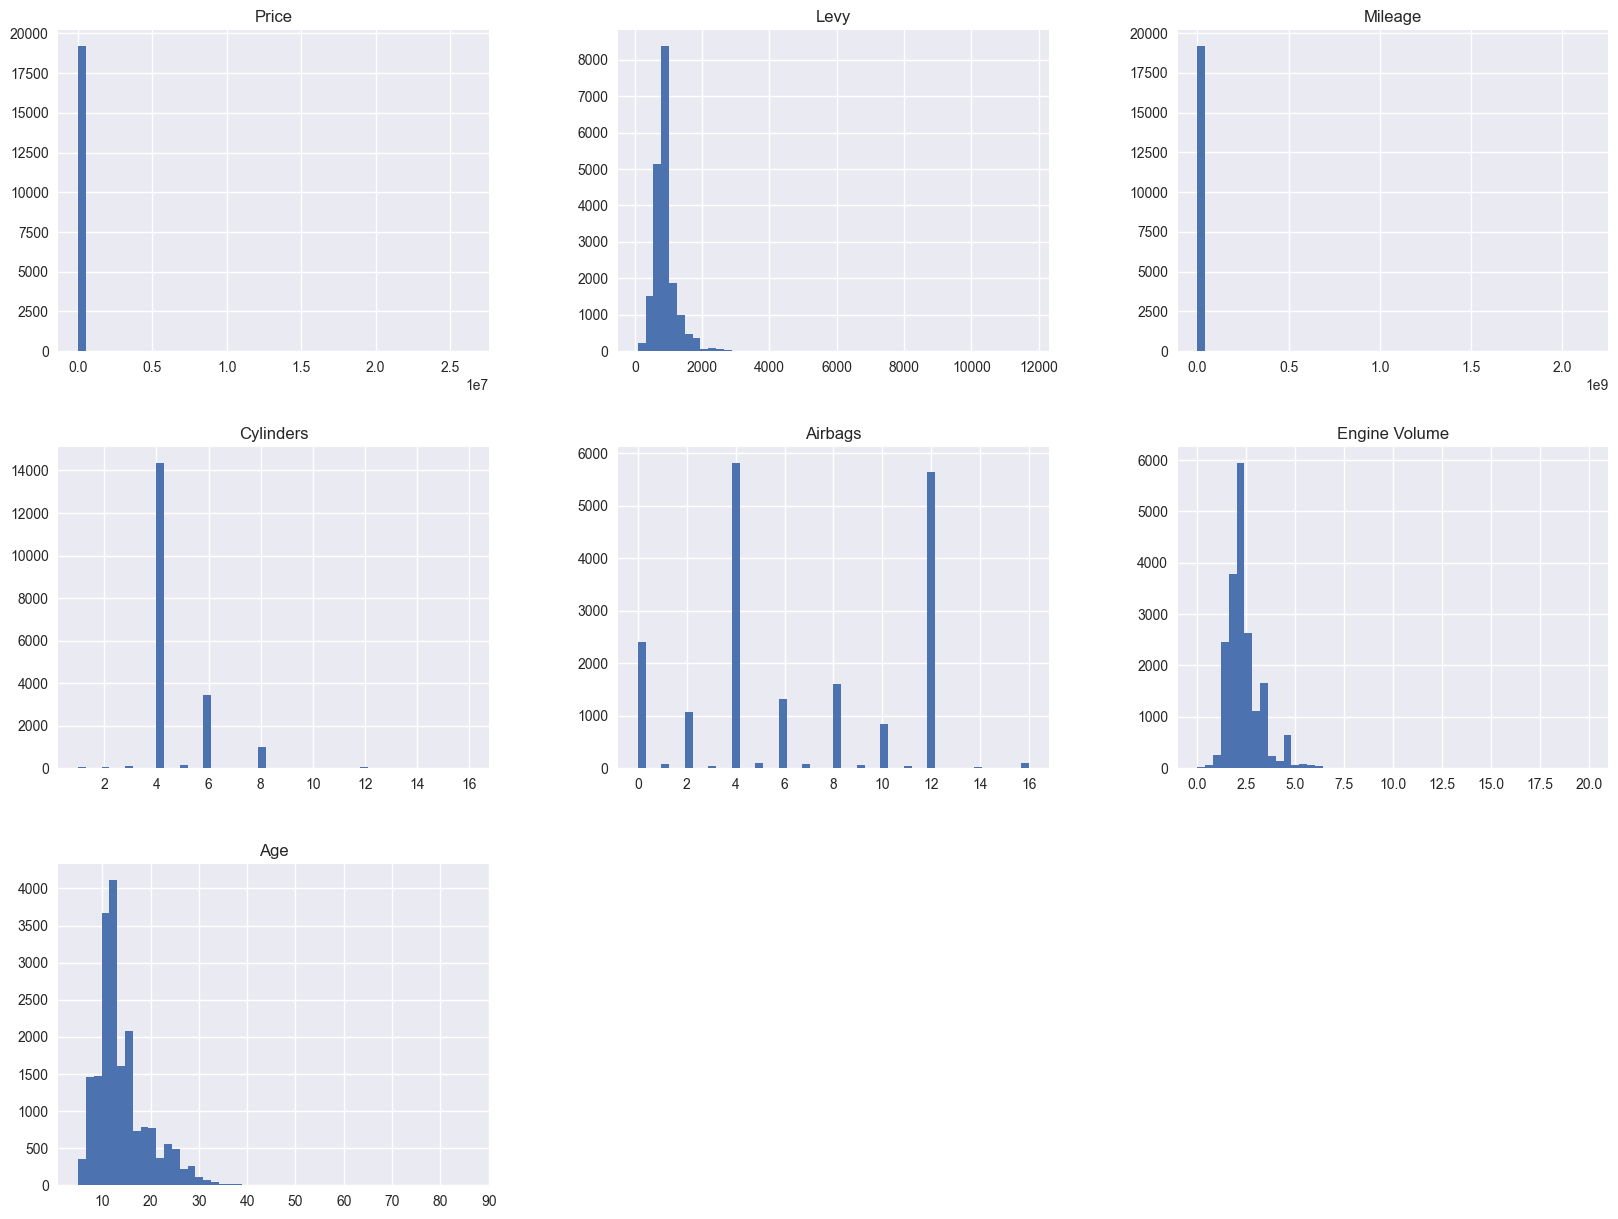

In [23]:
plt.style.use('seaborn-v0_8')
data.hist(bins = 50, figsize=(20,15))
plt.show()

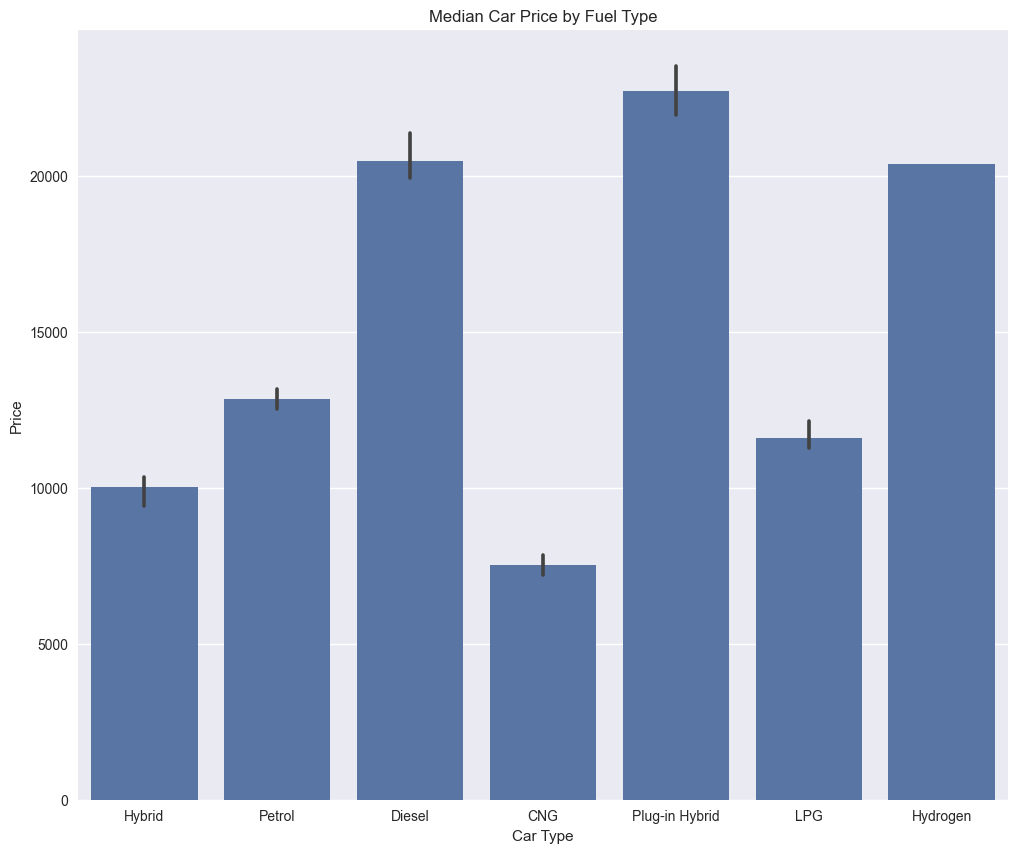

In [24]:
plt.figure(figsize=(12,10))
sns.barplot(x='Fuel type', y='Price', data=data, estimator='median')
plt.title("Median Car Price by Fuel Type")
plt.xlabel("Car Type")
plt.ylabel("Price")
plt.show()

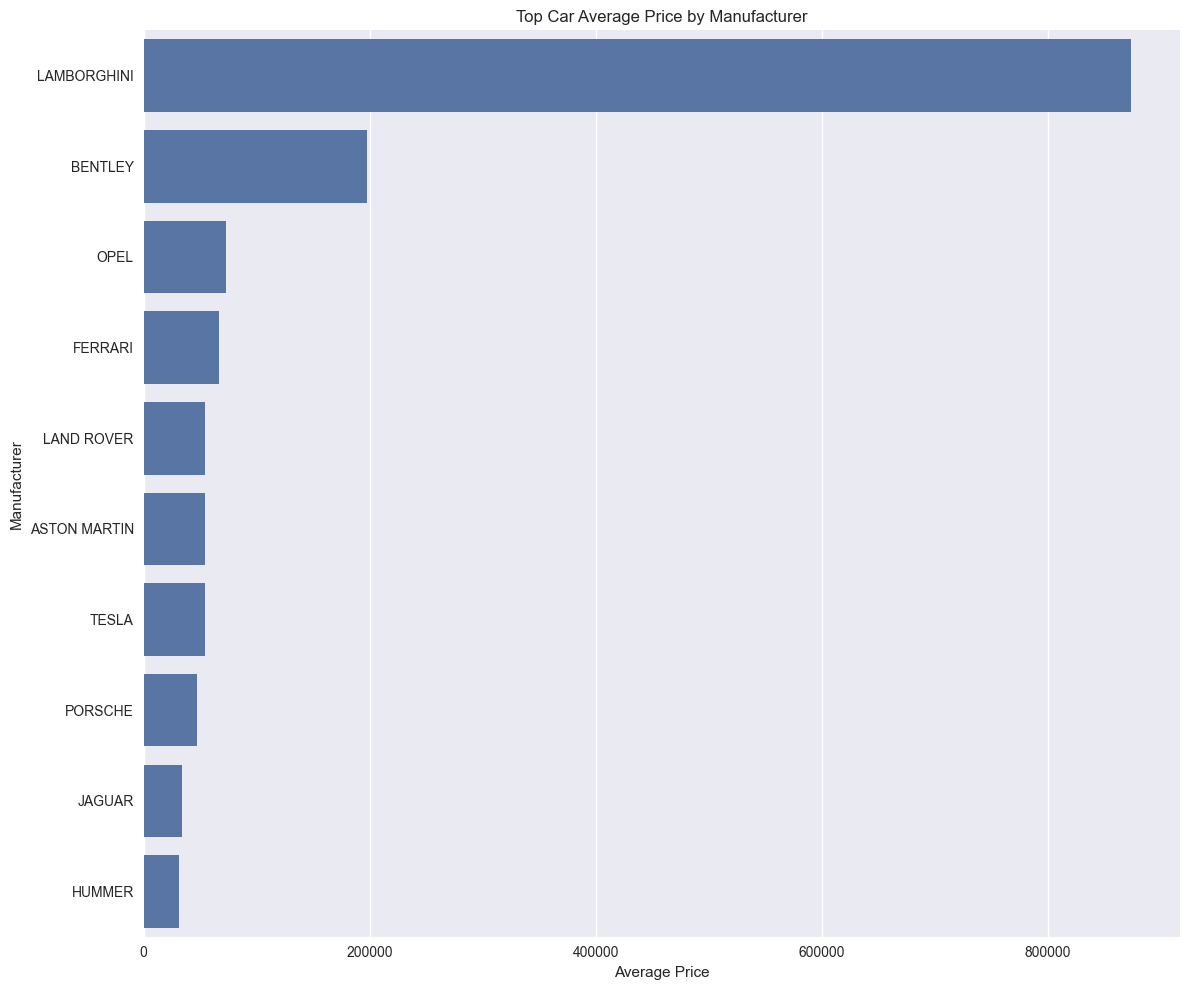

In [25]:
avg_car = data.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
top_manufacturer=avg_car.head(10).reset_index()
plt.figure(figsize=(12,10))
sns.barplot(data=top_manufacturer, x='Price', y='Manufacturer')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Top Car Average Price by Manufacturer')
plt.tight_layout()
plt.show()

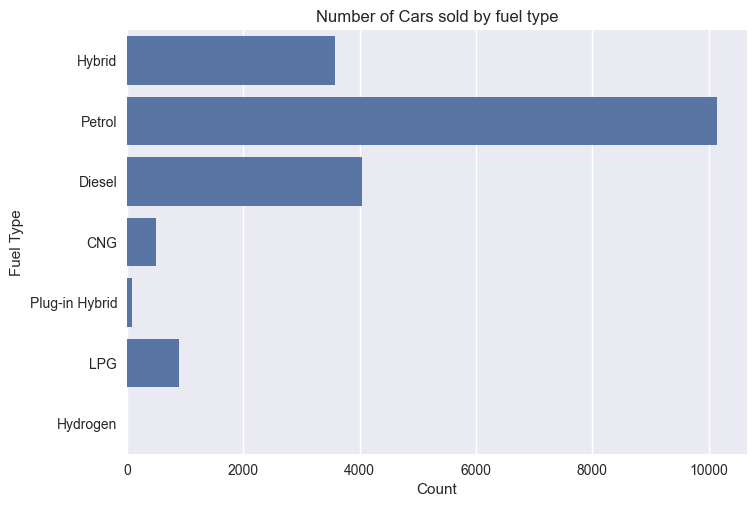

In [26]:
plt.Figure(figsize=(12,10))
sns.countplot(data=data, y='Fuel type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.title("Number of Cars sold by fuel type")
plt.tight_layout
plt.show()

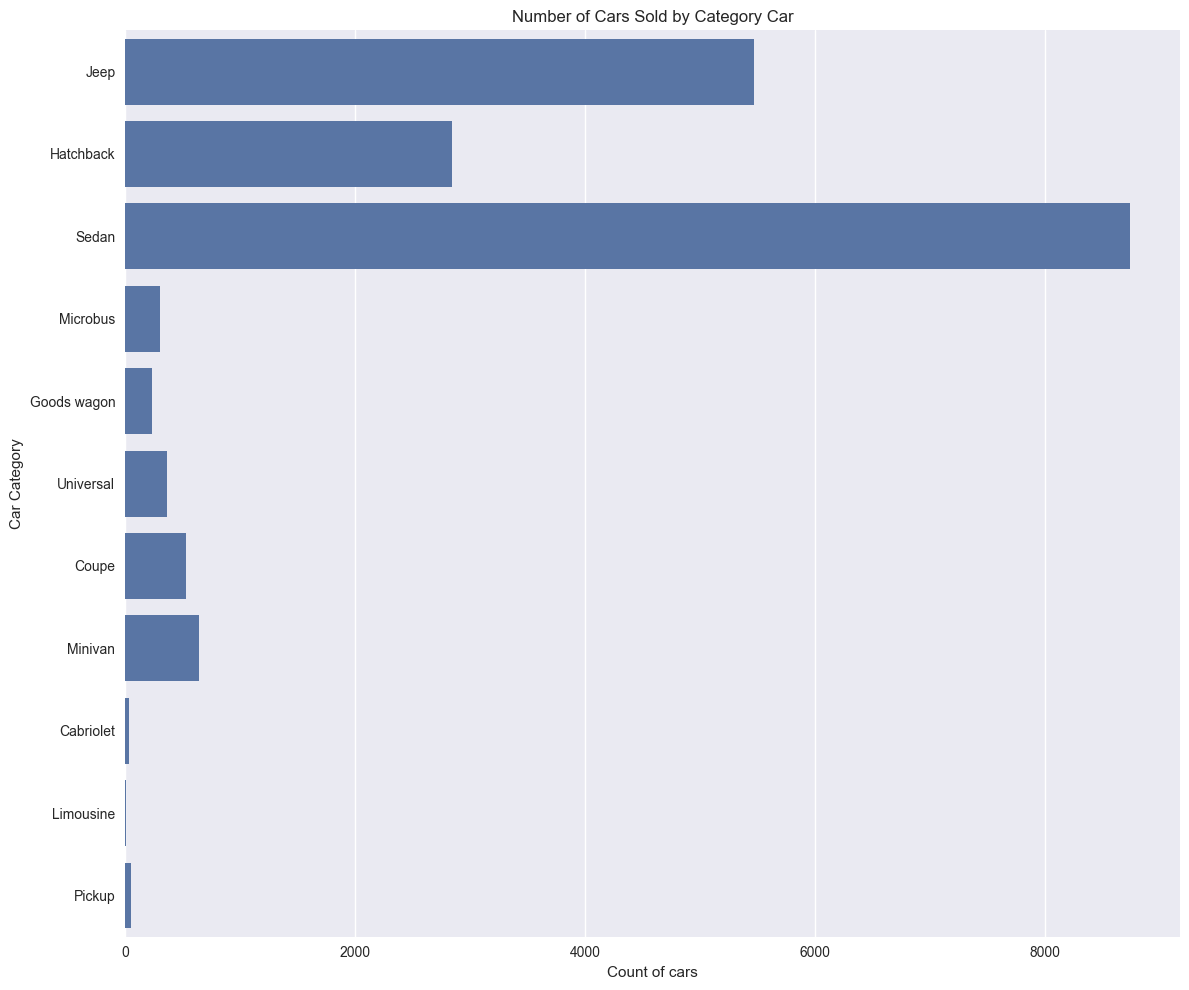

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(data=data, y='Category')
plt.xlabel('Count of cars')
plt.ylabel('Car Category')
plt.title("Number of Cars Sold by Category Car")
plt.tight_layout()
plt.show()


In [29]:
data.corr

<bound method DataFrame.corr of        Price         Levy   Manufacturer    Model   Category Leather interior  \
0      13328  1399.000000          LEXUS   RX 450       Jeep              Yes   
1      16621  1018.000000      CHEVROLET  Equinox       Jeep               No   
2       8467   906.838128          HONDA      FIT  Hatchback               No   
3       3607   862.000000           FORD   Escape       Jeep              Yes   
4      11726   446.000000          HONDA      FIT  Hatchback              Yes   
...      ...          ...            ...      ...        ...              ...   
19232   8467   906.838128  MERCEDES-BENZ  CLK 200      Coupe              Yes   
19233  15681   831.000000        HYUNDAI   Sonata      Sedan              Yes   
19234  26108   836.000000        HYUNDAI   Tucson       Jeep              Yes   
19235   5331  1288.000000      CHEVROLET  Captiva       Jeep              Yes   
19236    470   753.000000        HYUNDAI   Sonata      Sedan              Yes

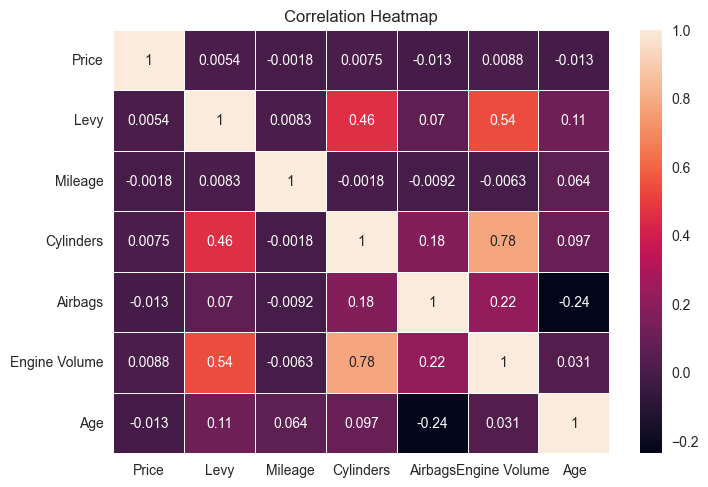

In [30]:
data1 = data.select_dtypes(exclude='object').corr()
sns.heatmap(data1, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
data.to_csv('car_price_prediction_updated.csv', index=False)